In [138]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures


color = sns.color_palette()
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

sns.set_style('whitegrid')
%matplotlib inline


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import sys
!{sys.executable} -m pip install pandas-profiling

import pandas_profiling as pp

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Dataset Import
import statsmodels.api as sm

#pp.ProfileReport(df, correlation_threshold = 1.1)

# File system manangement

import os

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.offline as offline
#offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
#import cufflinks as cf
#cf.go_offline()

# from sklearn import preprocessing
# # Supress unnecessary warnings so that presentation looks clean
# import warnings

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
train = pd.read_csv('C:/Users/leo.lillard/OneDrive - Sterling Lumber Company/Documents/Kaggle/Loan default/application_train.csv')
#test = pd.read_csv('C:/Users/leo.lillard/OneDrive - Sterling Lumber Company/Documents/Kaggle/Loan default/application_test.csv')
#poscashbal = pd.read_csv('C:/Users/leo.lillard/OneDrive - Sterling Lumber Company/Documents/Kaggle/Loan default/POS_CASH_balance.csv')
#burbal = pd.read_csv('C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\\Documents\\Kaggle\\Loan default\\bureau_balance.csv')
#preapp = pd.read_csv('C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\Documents\\Kaggle\\Loan default\\previous_application.csv')
#installpy = pd.read_csv('C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\\Documents\\Kaggle\\Loan default\\installments_payments.csv')
#crcbal = pd.read_csv('C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\\Documents\\Kaggle\\Loan default\\credit_card_balance.csv')
#bur = pd.read_csv('C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\\Documents\\Kaggle\\Loan default\\bureau.csv')
#test = pd.read_csv('C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\\Documents\\Kaggle\\Loan default\\application_test.csv')

In [3]:
# List files available
print(os.listdir("C:\\Users\\leo.lillard\\OneDrive - Sterling Lumber Company\\Documents\\Kaggle\\input"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [23]:
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                 307511.000000     307511.000000   
mean              ...                      0.008130          0.000595   
std               ...                      0.089798          0.024387   
min               ...                      0.000000          0.000000   
25%               ...                      0.000000          0.000000   
50%               ...                      0.000000          0.000000   
75%               ...                      0.000000          0.000000   
max               ...                      1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.

In [25]:
train.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [3]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [26]:
train_c = train.copy()

In [27]:
train_c.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [28]:
train_ml = train_c.copy()

In [29]:
train_ml.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

# Examine Missing Values 
Function

In [30]:
print('Size of application_train data', train.shape)
#print('Size of application_test data', test.shape)
#print('Size of POS_CASH_balance data', poscashbal.shape)
#print('Size of bureau_balance data', burbal.shape)
#print('Size of previous_application data', preapp.shape)
#print('Size of installments_payments data', installpy.shape)
#print('Size of credit_card_balance data', crcbal.shape)
#print('Size of bureau data', bur.shape)

Size of application_train data (307511, 122)


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [32]:
####  Missing value Code  #####

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
miss_data.head(125)

Total   Percent
COMMONAREA_MEDI              214865  0.698723
COMMONAREA_AVG               214865  0.698723
COMMONAREA_MODE              214865  0.698723
NONLIVINGAPARTMENTS_MODE     213514  0.694330
NONLIVINGAPARTMENTS_MEDI     213514  0.694330
NONLIVINGAPARTMENTS_AVG      213514  0.694330
FONDKAPREMONT_MODE           210295  0.683862
LIVINGAPARTMENTS_MEDI        210199  0.683550
LIVINGAPARTMENTS_MODE        210199  0.683550
LIVINGAPARTMENTS_AVG         210199  0.683550
FLOORSMIN_MEDI               208642  0.678486
FLOORSMIN_MODE               208642  0.678486
FLOORSMIN_AVG                208642  0.678486
YEARS_BUILD_MEDI             204488  0.664978
YEARS_BUILD_AVG              204488  0.664978
YEARS_BUILD_MODE             204488  0.664978
OWN_CAR_AGE                  202929  0.659908
LANDAREA_MODE                182590  0.593767
LANDAREA_AVG                 182590  0.593767
LANDAREA_MEDI                182590  0.593767
BASEMENTAREA_MEDI            179943  0.585160
BASEMENTAREA_AVG             179943  0.585160
BASEMENTAREA_MODE            179943  0.585160
EXT_SOURCE_1                 173378  0.563811
NONLIVINGAREA_MEDI           169682  0.551792
NONLIVINGAREA_AVG            169682  0.551792
NONLIVINGAREA_MODE           169682  0.551792
ELEVATORS_MODE               163891  0.532960
ELEVATORS_AVG                163891  0.532960
ELEVATORS_MEDI               163891  0.532960
...                             ...       ...
REGION_RATING_CLIENT_W_CITY       0  0.000000
WEEKDAY_APPR_PROCESS_START        0  0.000000
FLAG_DOCUMENT_2                   0  0.000000
FLAG_DOCUMENT_3                   0  0.000000
FLAG_DOCUMENT_4                   0  0.000000
FLAG_DOCUMENT_5                   0  0.000000
FLAG_DOCUMENT_6                   0  0.000000
FLAG_DOCUMENT_7                   0  0.000000
FLAG_DOCUMENT_8                   0  0.000000
FLAG_DOCUMENT_9                   0  0.000000
FLAG_DOCUMENT_10                  0  0.000000
FLAG_DOCUMENT_11                  0  0.000000
FLAG_DOCUMENT_12                  0  0.000000
FLAG_DOCUMENT_13                  0  0.000000
FLAG_DOCUMENT_14                  0  0.000000
FLAG_DOCUMENT_15                  0  0.000000
FLAG_DOCUMENT_16                  0  0.000000
FLAG_DOCUMENT_17                  0  0.000000
FLAG_DOCUMENT_18                  0  0.000000
FLAG_DOCUMENT_19                  0  0.000000
FLAG_DOCUMENT_20                  0  0.000000
FLAG_DOCUMENT_21                  0  0.000000
ORGANIZATION_TYPE                 0  0.000000
LIVE_CITY_NOT_WORK_CITY           0  0.000000
REG_CITY_NOT_WORK_CITY            0  0.000000
REG_CITY_NOT_LIVE_CITY            0  0.000000
LIVE_REGION_NOT_WORK_REGION       0  0.000000
REG_REGION_NOT_WORK_REGION        0  0.000000
HOUR_APPR_PROCESS_START           0  0.000000
SK_ID_CURR                        0  0.000000

[122 rows x 2 columns]

In [33]:
# Number of each type of column
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [34]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# EDA on target variable


In [35]:
# Analysis target variable 0=repaid 1= Default
print(train.TARGET.value_counts())
print(train.TARGET.value_counts(normalize = True))

0    282686
1     24825
Name: TARGET, dtype: int64
0    0.919271
1    0.080729
Name: TARGET, dtype: float64


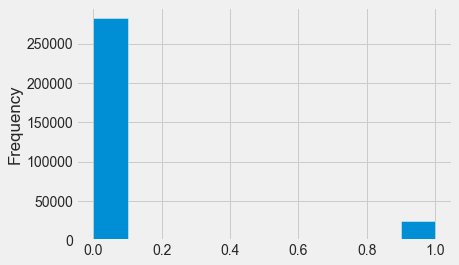

In [36]:
train['TARGET'].astype(int).plot.hist();

In [37]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [38]:
train.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

In [39]:
train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

In [40]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


In [41]:
train.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [42]:
#Create new col Age_yr from Days_Birth and turn positive
train['Age_yr'] = round(train['DAYS_BIRTH'] / -365,1)

In [43]:
train.Age_yr.describe()

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: Age_yr, dtype: float64

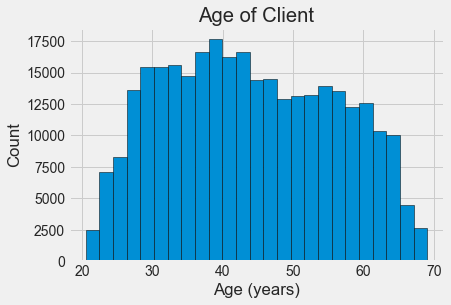

In [44]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['Age_yr'], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [45]:
train.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

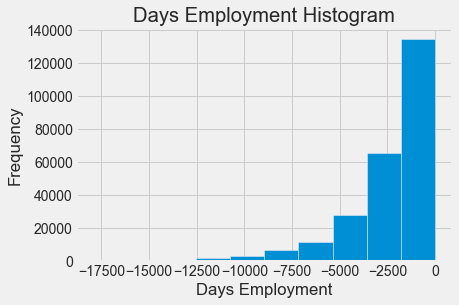

In [46]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan and convert to mean value later
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [47]:
#Create a new col Emp_yr from days_employed and make positive
train['Emp_yr'] = round(train['DAYS_EMPLOYED'] / -365,1)

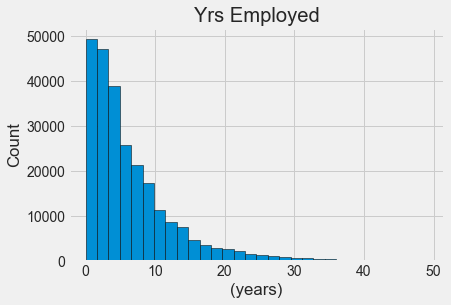

In [48]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['Emp_yr'], edgecolor = 'k', bins = 30)
plt.title('Yrs Employed'); plt.xlabel('(years)'); plt.ylabel('Count');

In [49]:
train.Emp_yr.describe()

count    252137.000000
mean          6.531905
std           6.406565
min           0.000000
25%           2.100000
50%           4.500000
75%           8.700000
max          49.100000
Name: Emp_yr, dtype: float64

In [50]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

    ...    FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0   ...                   0                        0.0   
1   ...                   0                        0.0   
2   ...                   0                        0.0   
3   ...                   0                        NaN   
4   ...                   0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       NaN                       NaN   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Age_yr  DAYS_EMPLOYED_ANOM  Emp_yr  
0                         1.0    25.9               False     1.7  
1                         0.0    45.9               False     3.3  
2                         0.0    52.2               False     0.6  
3                         NaN    52.1               False     8.3  
4                         0.0    54.6               False     8.3  

[5 rows x 125 columns]

In [51]:
#Delete two old columns
train = train.drop(columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [52]:
train.shape

(307511, 123)

In [53]:
# Create a label encoder object change the (train_ml variable)
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            #test_ml[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [54]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
#test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
#print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 244)


In [55]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Most Positive Correlations:
 REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
Age_yr                                 -0.078237
Emp_yr                                 -0.074962
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
Name: TARGET, dtype: float64


# Create new dataframe with variables that will be used model II for machine learning

In [56]:
# Used variables with high correlation to taget only 

df = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_yr','Emp_yr','REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE_Higher education', 
            'CODE_GENDER_F', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'CODE_GENDER_M']]

In [57]:
df.head()

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  Age_yr  Emp_yr  \
0       1      0.083037      0.262949      0.139376    25.9     1.7   
1       0      0.311267      0.622246           NaN    45.9     3.3   
2       0           NaN      0.555912      0.729567    52.2     0.6   
3       0           NaN      0.650442           NaN    52.1     8.3   
4       0           NaN      0.322738           NaN    54.6     8.3   

   REGION_RATING_CLIENT_W_CITY  NAME_EDUCATION_TYPE_Higher education  \
0                            2                                     0   
1                            1                                     1   
2                            2                                     0   
3                            2                                     0   
4                            2                                     0   

   CODE_GENDER_F  REGION_RATING_CLIENT  NAME_INCOME_TYPE_Working  \
0              0                     2                         1   
1              1                     1                         0   
2              0                     2                         1   
3              1                     2                         1   
4              0                     2                         1   

   CODE_GENDER_M  
0              1  
1              0  
2              1  
3              0  
4              1

In [58]:
####  Missing value Code  #####

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
miss_data.head(12)

Total   Percent
EXT_SOURCE_1                          173378  0.563811
EXT_SOURCE_3                           60965  0.198253
Emp_yr                                 55374  0.180072
EXT_SOURCE_2                             660  0.002146
CODE_GENDER_M                              0  0.000000
NAME_INCOME_TYPE_Working                   0  0.000000
REGION_RATING_CLIENT                       0  0.000000
CODE_GENDER_F                              0  0.000000
NAME_EDUCATION_TYPE_Higher education       0  0.000000
REGION_RATING_CLIENT_W_CITY                0  0.000000
Age_yr                                     0  0.000000
TARGET                                     0  0.000000

In [59]:
#Fill in missing values for ML
df.EXT_SOURCE_1.fillna(df.EXT_SOURCE_1.mean(), inplace=True)
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.mean(), inplace=True)
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.mean(), inplace=True)
df.Emp_yr.fillna(df.Emp_yr.median(), inplace=True)

In [61]:
####  Missing value Code  #####

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
miss_data.head(12)

Total  Percent
CODE_GENDER_M                             0      0.0
NAME_INCOME_TYPE_Working                  0      0.0
REGION_RATING_CLIENT                      0      0.0
CODE_GENDER_F                             0      0.0
NAME_EDUCATION_TYPE_Higher education      0      0.0
REGION_RATING_CLIENT_W_CITY               0      0.0
Emp_yr                                    0      0.0
Age_yr                                    0      0.0
EXT_SOURCE_3                              0      0.0
EXT_SOURCE_2                              0      0.0
EXT_SOURCE_1                              0      0.0
TARGET                                    0      0.0

# EDA on the training set categorical variables

### Used traing and not df

In [67]:
print(train_c.CODE_GENDER.value_counts(normalize = False,dropna = False))
print(train_c.CODE_GENDER.value_counts(normalize = True,dropna = False))

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


In [68]:
train_c.groupby('CODE_GENDER').TARGET.value_counts(normalize = True)

CODE_GENDER  TARGET
F            0         0.930007
             1         0.069993
M            0         0.898581
             1         0.101419
XNA          0         1.000000
Name: TARGET, dtype: float64

In [69]:
print(train_c.FLAG_OWN_CAR.value_counts(normalize = False,dropna = False))
print(train_c.FLAG_OWN_CAR.value_counts(normalize = True,dropna = False))

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


In [70]:
train_c.groupby('FLAG_OWN_CAR').TARGET.value_counts(normalize = True)

FLAG_OWN_CAR  TARGET
N             0         0.914998
              1         0.085002
Y             0         0.927563
              1         0.072437
Name: TARGET, dtype: float64

In [71]:
print(train_c.FLAG_OWN_REALTY.value_counts(normalize = False,dropna = False))
print(train_c.FLAG_OWN_REALTY.value_counts(normalize = True,dropna = False))

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


In [72]:
train_c.groupby('FLAG_OWN_REALTY').TARGET.value_counts(normalize = True)

FLAG_OWN_REALTY  TARGET
N                0         0.916751
                 1         0.083249
Y                0         0.920384
                 1         0.079616
Name: TARGET, dtype: float64

In [73]:
print(train_c.FLAG_OWN_REALTY.value_counts(normalize = False,dropna = False))
print(train_c.FLAG_OWN_REALTY.value_counts(normalize = True,dropna = False))

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


In [74]:
train_c.groupby('FLAG_OWN_REALTY').TARGET.value_counts(normalize = True)

FLAG_OWN_REALTY  TARGET
N                0         0.916751
                 1         0.083249
Y                0         0.920384
                 1         0.079616
Name: TARGET, dtype: float64

In [75]:
print(train_c.NAME_INCOME_TYPE.value_counts(normalize = False,dropna = False))
print(train_c.NAME_INCOME_TYPE.value_counts(normalize = True,dropna = False))

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


In [76]:
train_c.groupby('NAME_INCOME_TYPE').TARGET.value_counts(normalize = True)

NAME_INCOME_TYPE      TARGET
Businessman           0         1.000000
Commercial associate  0         0.925157
                      1         0.074843
Maternity leave       0         0.600000
                      1         0.400000
Pensioner             0         0.946136
                      1         0.053864
State servant         0         0.942450
                      1         0.057550
Student               0         1.000000
Unemployed            0         0.636364
                      1         0.363636
Working               0         0.904115
                      1         0.095885
Name: TARGET, dtype: float64

In [77]:
print(train_c.NAME_FAMILY_STATUS.value_counts(normalize = False,dropna = False))
print(train_c.NAME_FAMILY_STATUS.value_counts(normalize = True,dropna = False))

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


In [78]:
train_c.groupby('NAME_FAMILY_STATUS').TARGET.value_counts(normalize = True)

NAME_FAMILY_STATUS    TARGET
Civil marriage        0         0.900554
                      1         0.099446
Married               0         0.924401
                      1         0.075599
Separated             0         0.918058
                      1         0.081942
Single / not married  0         0.901923
                      1         0.098077
Unknown               0         1.000000
Widow                 0         0.941758
                      1         0.058242
Name: TARGET, dtype: float64

In [79]:
print(train_c.OCCUPATION_TYPE.value_counts(normalize = False,dropna = False))
print(train_c.OCCUPATION_TYPE.value_counts(normalize = True,dropna = False))

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
C

In [80]:
train_c.groupby('OCCUPATION_TYPE').TARGET.value_counts(normalize = True, dropna = False)

OCCUPATION_TYPE        TARGET
Accountants            0         0.951697
                       1         0.048303
Cleaning staff         0         0.903933
                       1         0.096067
Cooking staff          0         0.895560
                       1         0.104440
Core staff             0         0.936960
                       1         0.063040
Drivers                0         0.886739
                       1         0.113261
HR staff               0         0.936057
                       1         0.063943
High skill tech staff  0         0.938401
                       1         0.061599
IT staff               0         0.935361
                       1         0.064639
Laborers               0         0.894212
                       1         0.105788
Low-skill Laborers     0         0.828476
                       1         0.171524
Managers               0         0.937860
                       1         0.062140
Medicine staff         0         0.932998
    

In [81]:
print(train_c.NAME_EDUCATION_TYPE.value_counts(normalize = False,dropna = False))
print(train_c.NAME_EDUCATION_TYPE.value_counts(normalize = True,dropna = False))

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


In [82]:
train_c.groupby('NAME_EDUCATION_TYPE').TARGET.value_counts(normalize = True)

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         0.981707
                               1         0.018293
Higher education               0         0.946449
                               1         0.053551
Incomplete higher              0         0.915150
                               1         0.084850
Lower secondary                0         0.890723
                               1         0.109277
Secondary / secondary special  0         0.910601
                               1         0.089399
Name: TARGET, dtype: float64

In [83]:
print(train_c.NAME_HOUSING_TYPE.value_counts(normalize = False,dropna = False))
print(train_c.NAME_HOUSING_TYPE.value_counts(normalize = True,dropna = False))

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


In [84]:
train_c.groupby('NAME_HOUSING_TYPE').TARGET.value_counts(normalize = True)

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0         0.920677
                     1         0.079323
House / apartment    0         0.922043
                     1         0.077957
Municipal apartment  0         0.914603
                     1         0.085397
Office apartment     0         0.934276
                     1         0.065724
Rented apartment     0         0.876869
                     1         0.123131
With parents         0         0.883019
                     1         0.116981
Name: TARGET, dtype: float64

In [85]:
print(train_c.ORGANIZATION_TYPE.value_counts(normalize = False,dropna = False))
print(train_c.ORGANIZATION_TYPE.value_counts(normalize = True,dropna = False))

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [86]:
train_c.groupby('ORGANIZATION_TYPE').TARGET.value_counts(normalize = True).sort_values(ascending = False)

ORGANIZATION_TYPE    TARGET
Trade: type 4        0         0.968750
Industry: type 12    0         0.962060
Transport: type 1    0         0.955224
Trade: type 6        0         0.954041
Security Ministries  0         0.951368
University           0         0.951017
Police               0         0.950021
Military             0         0.948747
Bank                 0         0.948145
XNA                  0         0.946004
Culture              0         0.944591
Insurance            0         0.943049
Religion             0         0.941176
School               0         0.940852
Trade: type 5        0         0.938776
Hotel                0         0.935818
Industry: type 10    0         0.935780
Medicine             0         0.934155
Services             0         0.933968
Electricity          0         0.933684
Industry: type 9     0         0.933195
Industry: type 5     0         0.931553
Government           0         0.930219
Trade: type 2        0         0.930000
Kindergarten

In [87]:
#train_ml = train_ml.drop(['Age Yr', 'Age_Yr'],axis= 1)

In [88]:
pp.ProfileReport(train, correlation_threshold = 1.1)

In [112]:
# Find the correlation of the positive days since birth and target
train_ml['Age_yr'] = abs(train_ml['Age_yr'])
train_ml['Age_yr'].corr(train_ml['TARGET'])

-0.078263135643790879

In [90]:
# Age information into a separate dataframe
age_data = train[['TARGET', 'Age_yr']]
age_data['YEARS_BIRTH'] = age_data['Age_yr']

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  Age_yr  YEARS_BIRTH  YEARS_BINNED
0       1    25.9         25.9  (25.0, 30.0]
1       0    45.9         45.9  (45.0, 50.0]
2       0    52.2         52.2  (50.0, 55.0]
3       0    52.1         52.1  (50.0, 55.0]
4       0    54.6         54.6  (50.0, 55.0]
5       0    46.4         46.4  (45.0, 50.0]
6       0    37.7         37.7  (35.0, 40.0]
7       0    51.6         51.6  (50.0, 55.0]
8       0    55.1         55.1  (55.0, 60.0]
9       0    39.6         39.6  (35.0, 40.0]

In [92]:
print(age_data.YEARS_BINNED.value_counts(normalize = False,dropna = False))
print(age_data.YEARS_BINNED.value_counts(normalize = True,dropna = False))

(35.0, 40.0]    42860
(40.0, 45.0]    41228
(30.0, 35.0]    39455
(45.0, 50.0]    35276
(50.0, 55.0]    34994
(55.0, 60.0]    33073
(25.0, 30.0]    33028
(60.0, 65.0]    27376
(20.0, 25.0]    12361
(65.0, 70.0]     7860
Name: YEARS_BINNED, dtype: int64
(35.0, 40.0]    0.139377
(40.0, 45.0]    0.134070
(30.0, 35.0]    0.128304
(45.0, 50.0]    0.114715
(50.0, 55.0]    0.113798
(55.0, 60.0]    0.107551
(25.0, 30.0]    0.107404
(60.0, 65.0]    0.089024
(20.0, 25.0]    0.040197
(65.0, 70.0]    0.025560
Name: YEARS_BINNED, dtype: float64


In [93]:
age_data.groupby('YEARS_BINNED').TARGET.value_counts(normalize = True).sort_values(ascending = False)

YEARS_BINNED  TARGET
(65.0, 70.0]  0         0.963486
(60.0, 65.0]  0         0.947070
(55.0, 60.0]  0         0.944698
(50.0, 55.0]  0         0.933217
(45.0, 50.0]  0         0.925927
(40.0, 45.0]  0         0.921728
(35.0, 40.0]  0         0.910219
(30.0, 35.0]  0         0.897427
(25.0, 30.0]  0         0.888852
(20.0, 25.0]  0         0.877275
              1         0.122725
(25.0, 30.0]  1         0.111148
(30.0, 35.0]  1         0.102573
(35.0, 40.0]  1         0.089781
(40.0, 45.0]  1         0.078272
(45.0, 50.0]  1         0.074073
(50.0, 55.0]  1         0.066783
(55.0, 60.0]  1         0.055302
(60.0, 65.0]  1         0.052930
(65.0, 70.0]  1         0.036514
Name: TARGET, dtype: float64

In [94]:
train.Emp_yr.describe()

count    252137.000000
mean          6.531905
std           6.406565
min           0.000000
25%           2.100000
50%           4.500000
75%           8.700000
max          49.100000
Name: Emp_yr, dtype: float64

In [95]:
# Years employed  information into a separate dataframe
emp_data = train[['TARGET', 'Emp_yr']]
emp_data['Emp_Years'] = emp_data['Emp_yr']

# Bin the age data
emp_data['YEARS_BINNED1'] = pd.cut(emp_data['Emp_Years'], bins = np.linspace(0, 20, num = 11))
emp_data.head(10)

TARGET  Emp_yr  Emp_Years YEARS_BINNED1
0       1     1.7        1.7    (0.0, 2.0]
1       0     3.3        3.3    (2.0, 4.0]
2       0     0.6        0.6    (0.0, 2.0]
3       0     8.3        8.3   (8.0, 10.0]
4       0     8.3        8.3   (8.0, 10.0]
5       0     4.4        4.4    (4.0, 6.0]
6       0     8.6        8.6   (8.0, 10.0]
7       0     1.2        1.2    (0.0, 2.0]
8       0     NaN        NaN           NaN
9       0     5.5        5.5    (4.0, 6.0]

In [96]:
print(emp_data.YEARS_BINNED1.value_counts(normalize = False,dropna = False))
print(emp_data.YEARS_BINNED1.value_counts(normalize = True,dropna = False))

NaN             67879
(0.0, 2.0]      61420
(2.0, 4.0]      54206
(4.0, 6.0]      37642
(6.0, 8.0]      28032
(8.0, 10.0]     20230
(10.0, 12.0]    13112
(12.0, 14.0]     9608
(14.0, 16.0]     7271
(16.0, 18.0]     4344
(18.0, 20.0]     3767
Name: YEARS_BINNED1, dtype: int64
NaN             0.220737
(0.0, 2.0]      0.199733
(2.0, 4.0]      0.176273
(4.0, 6.0]      0.122409
(6.0, 8.0]      0.091158
(8.0, 10.0]     0.065786
(10.0, 12.0]    0.042639
(12.0, 14.0]    0.031244
(14.0, 16.0]    0.023645
(16.0, 18.0]    0.014126
(18.0, 20.0]    0.012250
Name: YEARS_BINNED1, dtype: float64


In [97]:
emp_data.groupby('YEARS_BINNED1').TARGET.value_counts(normalize = True).sort_values(ascending = False)

YEARS_BINNED1  TARGET
(18.0, 20.0]   0         0.953544
(16.0, 18.0]   0         0.950046
(14.0, 16.0]   0         0.947187
(12.0, 14.0]   0         0.945566
(10.0, 12.0]   0         0.938758
(8.0, 10.0]    0         0.933959
(6.0, 8.0]     0         0.925621
(4.0, 6.0]     0         0.913873
(2.0, 4.0]     0         0.895528
(0.0, 2.0]     0         0.888098
               1         0.111902
(2.0, 4.0]     1         0.104472
(4.0, 6.0]     1         0.086127
(6.0, 8.0]     1         0.074379
(8.0, 10.0]    1         0.066041
(10.0, 12.0]   1         0.061242
(12.0, 14.0]   1         0.054434
(14.0, 16.0]   1         0.052813
(16.0, 18.0]   1         0.049954
(18.0, 20.0]   1         0.046456
Name: TARGET, dtype: float64

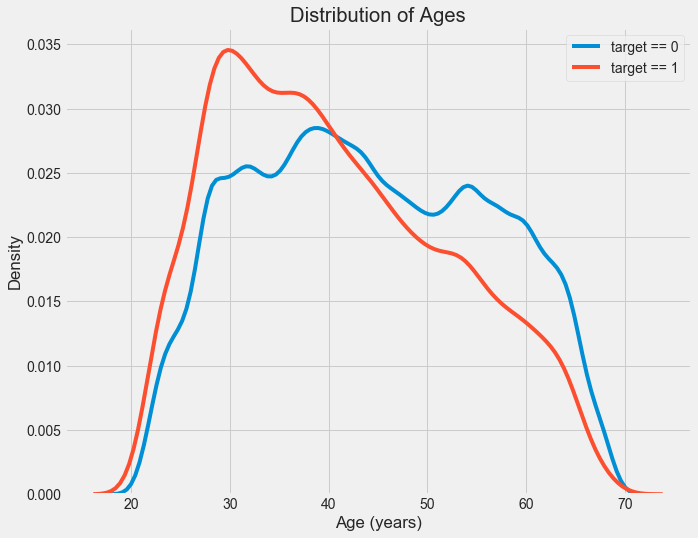

In [178]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0,'Age_yr'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'Age_yr'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [179]:
# Group by the bin and calculate averages 1 = failure to pay target % = defalut rate by age 
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET     Age_yr  YEARS_BIRTH
YEARS_BINNED                                  
(20.0, 25.0]  0.122725  23.404296    23.404296
(25.0, 30.0]  0.111148  27.864015    27.864015
(30.0, 35.0]  0.102573  32.526696    32.526696
(35.0, 40.0]  0.089781  37.600467    37.600467
(40.0, 45.0]  0.078272  42.493812    42.493812
(45.0, 50.0]  0.074073  47.500879    47.500879
(50.0, 55.0]  0.066783  52.645153    52.645153
(55.0, 60.0]  0.055302  57.546210    57.546210
(60.0, 65.0]  0.052930  62.465583    62.465583
(65.0, 70.0]  0.036514  66.602328    66.602328

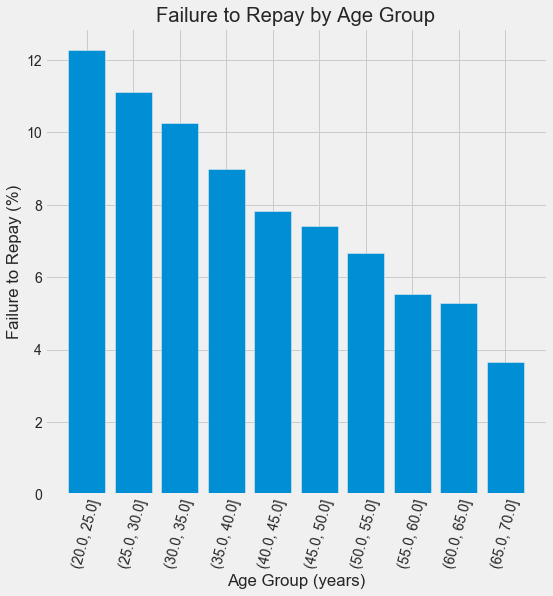

In [180]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# EDA for number of years Employed


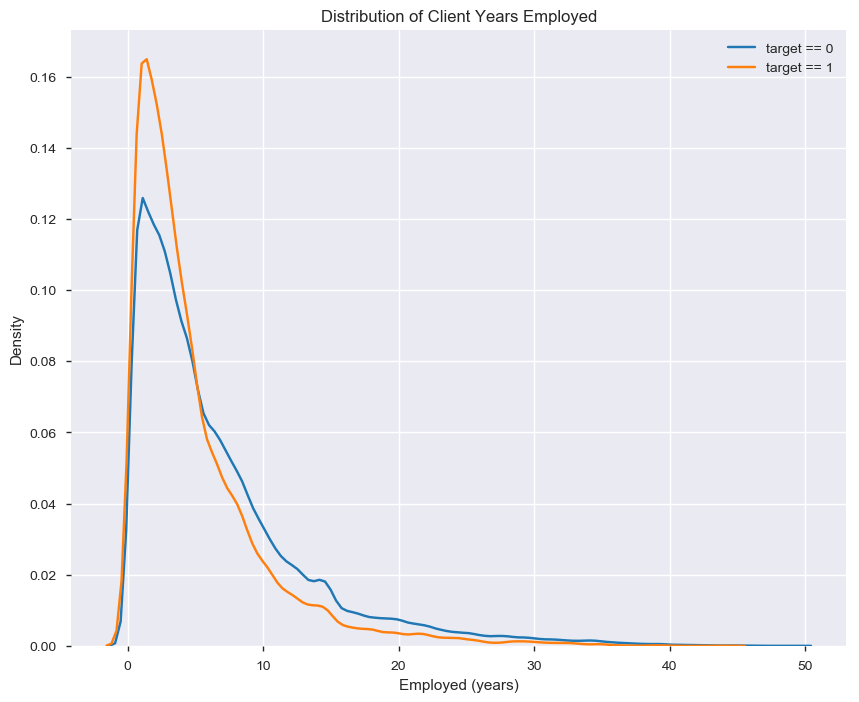

In [98]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0,'Emp_yr'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'Emp_yr'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Employed (years)'); plt.ylabel('Density'); plt.title('Distribution of Client Years Employed');

In [182]:
# Group by the bin and calculate averages
emp_groups  = emp_data.groupby('YEARS_BINNED1').mean()
emp_groups

TARGET     Emp_yr  Emp_Years
YEARS_BINNED1                                
(0.0, 2.0]     0.111902   1.097019   1.097019
(2.0, 4.0]     0.104472   2.993497   2.993497
(4.0, 6.0]     0.086127   4.960796   4.960796
(6.0, 8.0]     0.074379   7.003368   7.003368
(8.0, 10.0]    0.066041   8.976110   8.976110
(10.0, 12.0]   0.061242  10.983717  10.983717
(12.0, 14.0]   0.054434  12.993370  12.993370
(14.0, 16.0]   0.052813  14.892477  14.892477
(16.0, 18.0]   0.049954  17.000115  17.000115
(18.0, 20.0]   0.046456  19.043855  19.043855

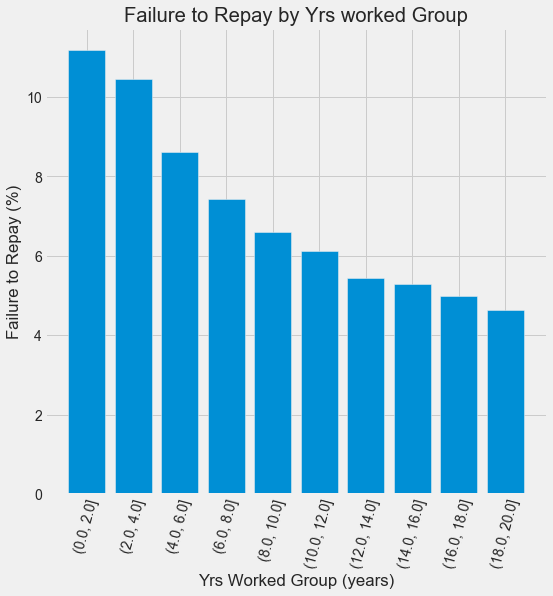

In [183]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(emp_groups.index.astype(str), 100 * emp_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Yrs Worked Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Yrs worked Group');

In [186]:
df = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_yr','Emp_yr','REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE_Higher education', 
            'CODE_GENDER_F', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'CODE_GENDER_M']]

In [103]:
# Create dateframe for Model #1 for ML
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_yr','Emp_yr','REGION_RATING_CLIENT_W_CITY' ]]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  \
TARGET                       1.000000     -0.155317     -0.160472   
EXT_SOURCE_1                -0.155317      1.000000      0.213982   
EXT_SOURCE_2                -0.160472      0.213982      1.000000   
EXT_SOURCE_3                -0.178919      0.186846      0.109167   
Age_yr                      -0.078237      0.600603      0.091998   
Emp_yr                      -0.074962      0.252729      0.093450   
REGION_RATING_CLIENT_W_CITY  0.060893     -0.115374     -0.288299   

                             EXT_SOURCE_3    Age_yr    Emp_yr  \
TARGET                          -0.178919 -0.078237 -0.074962   
EXT_SOURCE_1                     0.186846  0.600603  0.252729   
EXT_SOURCE_2                     0.109167  0.091998  0.093450   
EXT_SOURCE_3                     1.000000  0.205468  0.129718   
Age_yr                           0.205468  1.000000  0.352321   
Emp_yr                           0.129718  0.352321  1.000000   
REGION_RATING_CLIENT_W_CITY     -0.012158 -0.008078  0.009314   

                             REGION_RATING_CLIENT_W_CITY  
TARGET                                          0.060893  
EXT_SOURCE_1                                   -0.115374  
EXT_SOURCE_2                                   -0.288299  
EXT_SOURCE_3                                   -0.012158  
Age_yr                                         -0.008078  
Emp_yr                                          0.009314  
REGION_RATING_CLIENT_W_CITY                     1.000000

In [111]:
# fill nan with mean for model #1
ext_data.EXT_SOURCE_1.fillna(ext_data.EXT_SOURCE_1.mean(), inplace=True)
ext_data.EXT_SOURCE_2.fillna(ext_data.EXT_SOURCE_2.mean(), inplace=True)
ext_data.EXT_SOURCE_3.fillna(ext_data.EXT_SOURCE_3.mean(), inplace=True)
ext_data.Emp_yr.fillna(ext_data.Emp_yr.mean(), inplace=True)

In [112]:
# Create dateframe for Model #1 for ML
ext_data1 = df
ext_data_corrs1 = ext_data1.corr()
ext_data_corrs1

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  \
TARGET                                1.000000     -0.099152     -0.160303   
EXT_SOURCE_1                         -0.099152      1.000000      0.135721   
EXT_SOURCE_2                         -0.160303      0.135721      1.000000   
EXT_SOURCE_3                         -0.157397      0.110606      0.096653   
Age_yr                               -0.078237      0.358525      0.091887   
Emp_yr                               -0.063318      0.131329      0.085892   
REGION_RATING_CLIENT_W_CITY           0.060893     -0.077912     -0.288015   
NAME_EDUCATION_TYPE_Higher education -0.056593      0.095848      0.124459   
CODE_GENDER_F                        -0.054704      0.198718      0.014597   
REGION_RATING_CLIENT                  0.058899     -0.077904     -0.292610   
NAME_INCOME_TYPE_Working              0.057481     -0.122428     -0.067709   
CODE_GENDER_M                         0.054713     -0.198722     -0.014607   

                                      EXT_SOURCE_3    Age_yr    Emp_yr  \
TARGET                                   -0.157397 -0.078237 -0.063318   
EXT_SOURCE_1                              0.110606  0.358525  0.131329   
EXT_SOURCE_2                              0.096653  0.091887  0.085892   
EXT_SOURCE_3                              1.000000  0.181243  0.091894   
Age_yr                                    0.181243  1.000000  0.182670   
Emp_yr                                    0.091894  0.182670  1.000000   
REGION_RATING_CLIENT_W_CITY              -0.010757 -0.008078  0.003784   
NAME_EDUCATION_TYPE_Higher education     -0.020325 -0.115807  0.010525   
CODE_GENDER_F                             0.020562  0.148070  0.063871   
REGION_RATING_CLIENT                     -0.011400 -0.009365  0.005329   
NAME_INCOME_TYPE_Working                 -0.058759 -0.304561  0.049575   
CODE_GENDER_M                            -0.020529 -0.148056 -0.063895   

                                      REGION_RATING_CLIENT_W_CITY  \
TARGET                                                   0.060893   
EXT_SOURCE_1                                            -0.077912   
EXT_SOURCE_2                                            -0.288015   
EXT_SOURCE_3                                            -0.010757   
Age_yr                                                  -0.008078   
Emp_yr                                                   0.003784   
REGION_RATING_CLIENT_W_CITY                              1.000000   
NAME_EDUCATION_TYPE_Higher education                    -0.067580   
CODE_GENDER_F                                            0.017276   
REGION_RATING_CLIENT                                     0.950842   
NAME_INCOME_TYPE_Working                                 0.093937   
CODE_GENDER_M                                           -0.017288   

                                      NAME_EDUCATION_TYPE_Higher education  \
TARGET                                                           -0.056593   
EXT_SOURCE_1                                                      0.095848   
EXT_SOURCE_2                                                      0.124459   
EXT_SOURCE_3                                                     -0.020325   
Age_yr                                                           -0.115807   
Emp_yr                                                            0.010525   
REGION_RATING_CLIENT_W_CITY                                      -0.067580   
NAME_EDUCATION_TYPE_Higher education                              1.000000   
CODE_GENDER_F                                                     0.016031   
REGION_RATING_CLIENT                                             -0.065014   
NAME_INCOME_TYPE_Working                                         -0.074165   
CODE_GENDER_M                                                    -0.016032   

                                      CODE_GENDER_F  REGION_RATING_CLIENT  \
TARGET                                    -0.054704              0.05889

In [139]:
ext_data.head()

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  Age_yr  DAYS_EMPLOYED  \
0       1      0.083037      0.262949      0.139376    26.0         -637.0   
1       0      0.311267      0.622246           NaN    46.0        -1188.0   
2       0           NaN      0.555912      0.729567    52.0         -225.0   
3       0           NaN      0.650442           NaN    52.0        -3039.0   
4       0           NaN      0.322738           NaN    55.0        -3038.0   

   REGION_RATING_CLIENT_W_CITY  
0                            2  
1                            1  
2                            2  
3                            2  
4                            2

In [113]:
print(ext_data.shape)
print(ext_data1.shape)


(307511, 7)
(307511, 12)


In [108]:
print(ext_data.info())
print(ext_data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
TARGET                         307511 non-null int64
EXT_SOURCE_1                   134133 non-null float64
EXT_SOURCE_2                   306851 non-null float64
EXT_SOURCE_3                   246546 non-null float64
Age_yr                         307511 non-null float64
Emp_yr                         252137 non-null float64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
dtypes: float64(5), int64(2)
memory usage: 16.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
TARGET                                  307511 non-null int64
EXT_SOURCE_1                            307511 non-null float64
EXT_SOURCE_2                            307511 non-null float64
EXT_SOURCE_3                            307511 non-null float64
Age_yr                                  307511 non-null float64
Emp_yr                  

In [114]:
print(ext_data.isnull().sum())
print(ext_data1.isnull().sum())

TARGET                         0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
Age_yr                         0
Emp_yr                         0
REGION_RATING_CLIENT_W_CITY    0
dtype: int64
TARGET                                  0
EXT_SOURCE_1                            0
EXT_SOURCE_2                            0
EXT_SOURCE_3                            0
Age_yr                                  0
Emp_yr                                  0
REGION_RATING_CLIENT_W_CITY             0
NAME_EDUCATION_TYPE_Higher education    0
CODE_GENDER_F                           0
REGION_RATING_CLIENT                    0
NAME_INCOME_TYPE_Working                0
CODE_GENDER_M                           0
dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap')

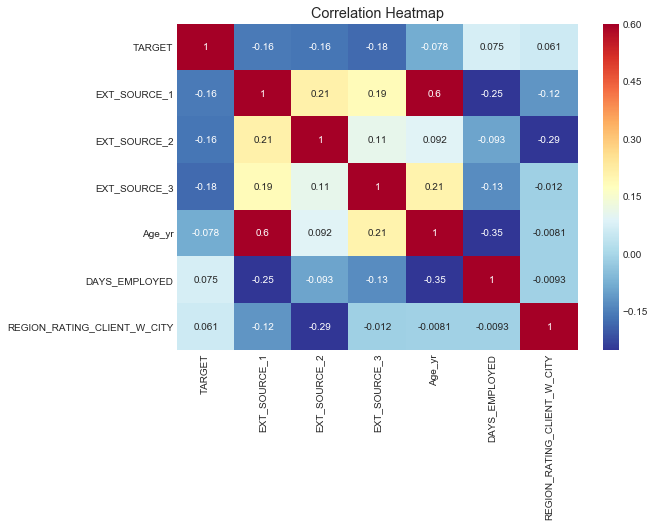

In [167]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

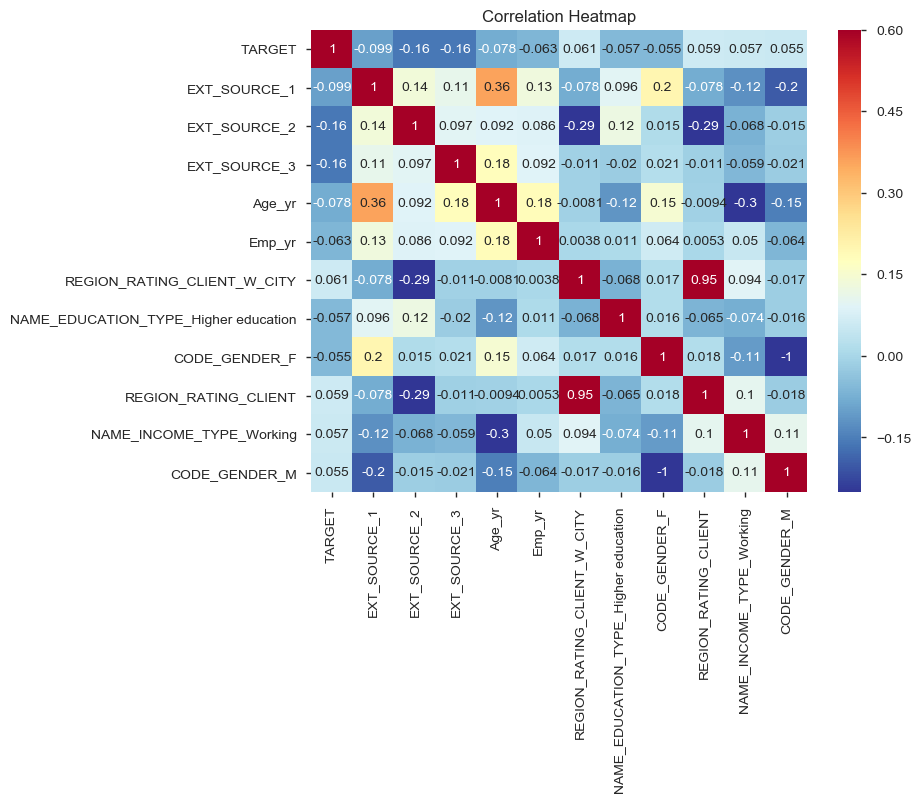

In [115]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs1, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

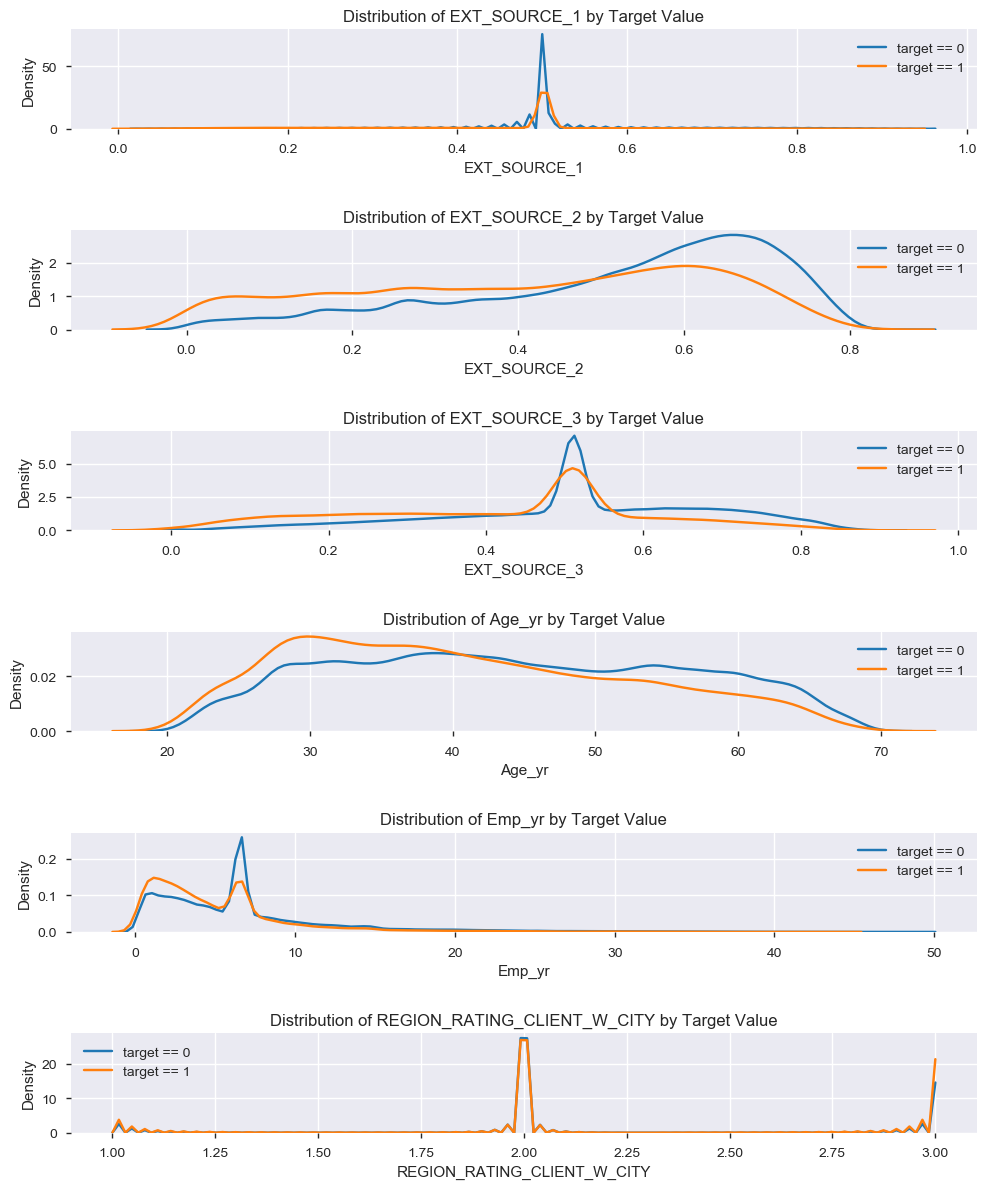

In [117]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_yr','Emp_yr','REGION_RATING_CLIENT_W_CITY']):
    
    # create a new subplot for each source
    plt.subplot(6, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(ext_data.loc[ext_data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(ext_data.loc[ext_data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [118]:
X = ext_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_yr','Emp_yr','REGION_RATING_CLIENT_W_CITY']]
y = ext_data["TARGET"]

In [120]:
X1 = ext_data1[[ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'Age_yr','Emp_yr','REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE_Higher education', 
            'CODE_GENDER_F', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'CODE_GENDER_M']]
y1 = ext_data1["TARGET"]

In [119]:
ext_data.describe()

TARGET   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  \
count  307511.000000  307511.000000  3.075110e+05  307511.000000   
mean        0.080729       0.502130  5.143927e-01       0.510853   
std         0.272419       0.139395  1.908550e-01       0.174464   
min         0.000000       0.014568  8.173617e-08       0.000527   
25%         0.000000       0.502130  3.929737e-01       0.417100   
50%         0.000000       0.502130  5.654672e-01       0.510853   
75%         0.000000       0.502130  6.634218e-01       0.636376   
max         1.000000       0.962693  8.549997e-01       0.896010   

              Age_yr         Emp_yr  REGION_RATING_CLIENT_W_CITY  
count  307511.000000  307511.000000                307511.000000  
mean       43.936992       6.531905                     2.031521  
std        11.956084       5.801136                     0.502737  
min        20.500000       0.000000                     1.000000  
25%        34.000000       2.600000                     2.000000  
50%        43.200000       6.100000                     2.000000  
75%        53.900000       7.600000                     2.000000  
max        69.100000      49.100000                     3.000000

In [125]:
print(X.shape)
print(X1.shape)
print(y.shape)
print(y.shape)

(307511, 6)
(307511, 11)
(307511,)
(307511,)


In [150]:
# Split the data for Model 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .2, random_state = 1234)

scaler = StandardScaler()

X_s = scaler.fit_transform(X)

X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)



In [151]:
# Split the data for Model 2 (11 variables)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y1, test_size = .2, random_state = 1234)

scaler = StandardScaler()

X1_s = scaler.fit_transform(X1)

X1_train_s = scaler.fit_transform(X1_train)

X1_test_s = scaler.transform(X1_test)

In [152]:
dummy = DummyClassifier(strategy = 'most_frequent', random_state=1)
dummy.fit(X_train, Y_train)
y_class = dummy.predict(X_test)
print("Most frequent class dummy test Accuracy Baseline: ", metrics.accuracy_score(Y_test, y_class))

Most frequent class dummy test Accuracy Baseline:  0.919776271076


In [149]:
##MODEL 1
# Make a new log_model
log_model = LogisticRegression()
log_model1 = LogisticRegression()

# Now fit the new model
log_model.fit(X_train, Y_train)
log_model1.fit(X_train_s, Y_train)

# Predict the classes of the testing data set
class_predict = log_model.predict(X_test)
class_predict1 = log_model1.predict(X_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(log_model,X,y, cv=10)
cross_val1 = cross_val_score(log_model,X_s,y, cv=10)


# Compare the predicted classes to the actual test classes
print ("Accuracy of Logistic Model not scaled : ", metrics.accuracy_score(Y_test,class_predict))
print ("Accuracy of Logistic Model scaled : ", metrics.accuracy_score(Y_test,class_predict1))
print()

print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy not scaled", np.mean(cross_val1))

print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y_test,class_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y_test,class_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y_test,class_predict))
print("Classification report not STD \n",metrics.classification_report(Y_test,class_predict1))

Accuracy of Logistic Model not scaled :  0.919760011707
Accuracy of Logistic Model scaled :  0.919792530446

Mean cv-accuracy not scaled 0.919115088881
Mean cv-accuracy not scaled 0.91911183706

Confusion matrix at .5 threshold not STD: 
 [[56551    18]
 [ 4917    17]]
Confusion matrix at .5 threshold STD: 
 [[56547    22]
 [ 4911    23]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.49      0.00      0.01      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.70      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.51      0.00      0.01      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.72      0.50      0.48     6

In [153]:
##  MODEL 2
# Make a new log_model
log_model = LogisticRegression()
log_model1 = LogisticRegression()

# Now fit the new model
log_model.fit(X1_train, Y1_train)
log_model1.fit(X1_train_s, Y1_train)

# Predict the classes of the testing data set
class_predict = log_model.predict(X1_test)
class_predict1 = log_model1.predict(X1_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(log_model,X1,y1, cv=10)
cross_val1 = cross_val_score(log_model,X1_s,y1, cv=10)


# Compare the predicted classes to the actual test classes
print ("Accuracy of Logistic Model not scaled : ", metrics.accuracy_score(Y1_test,class_predict))
print ("Accuracy of Logistic Model scaled : ", metrics.accuracy_score(Y1_test,class_predict1))
print()

print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy not scaled", np.mean(cross_val1))
print()

print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y1_test,class_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y_test,class_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y1_test,class_predict))
print("Classification report not STD \n",metrics.classification_report(Y1_test,class_predict1))

Accuracy of Logistic Model not scaled :  0.919694974229
Accuracy of Logistic Model scaled :  0.919694974229

Mean cv-accuracy not scaled 0.919144356962
Mean cv-accuracy not scaled 0.919144356751

Confusion matrix at .5 threshold not STD: 
 [[56540    29]
 [ 4910    24]]
Confusion matrix at .5 threshold STD: 
 [[56540    29]
 [ 4910    24]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.45      0.00      0.01      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.69      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.45      0.00      0.01      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.69      0.50      0.48     

In [155]:
##  MODEL 1 ##
rf = RandomForestClassifier(n_estimators=50) #random forest with 50 trees
rf1 = RandomForestClassifier(n_estimators=50)

rf_fit = rf.fit(X_train,Y_train) 
rf_fit1 = rf1.fit(X_train_s,Y_train)

rf_predict = rf_fit.predict(X_test)
rf_predict1 = rf_fit1.predict(X_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(rf,X,y, cv=10)
cross_val1 = cross_val_score(rf1,X_s,y, cv=10)

print("Accuracy of RF Model un_scaled : ", metrics.accuracy_score(Y_test,rf_predict))
print("Accuracy of RF Model scaled : ", metrics.accuracy_score(Y_test,rf_predict1))
print()

print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy not scaled", np.mean(cross_val1))
print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y_test,rf_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y_test,rf_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y_test,rf_predict))
print("Classification report not STD \n",metrics.classification_report(Y_test,rf_predict1))


Accuracy of RF Model un_scaled :  0.918995821342
Accuracy of RF Model scaled :  0.919125896298

Mean cv-accuracy not scaled 0.917993174569
Mean cv-accuracy not scaled 0.917928139417

Confusion matrix at .5 threshold not STD: 
 [[56409   160]
 [ 4822   112]]
Confusion matrix at .5 threshold STD: 
 [[56409   160]
 [ 4814   120]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.41      0.02      0.04      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.67      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.43      0.02      0.05      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.67      0.51      0.50     61503
weighte

In [159]:
##   MODEL 2 ###
rf = RandomForestClassifier(n_estimators=50) #random forest with 50 trees
rf1 = RandomForestClassifier(n_estimators=50)

rf_fit = rf.fit(X1_train,Y1_train) 
rf_fit1 = rf1.fit(X1_train_s,Y1_train)

rf_predict = rf_fit.predict(X1_test)
rf_predict1 = rf_fit1.predict(X1_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(rf,X1,y, cv=10)
cross_val1 = cross_val_score(rf1,X1_s,y, cv=10)

print("Accuracy of RF Model un_scaled : ", metrics.accuracy_score(Y1_test,rf_predict))
print("Accuracy of RF Model scaled : ", metrics.accuracy_score(Y1_test,rf_predict1))
print()

print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy not scaled", np.mean(cross_val1))
print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y1_test,rf_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y1_test,rf_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y1_test,rf_predict))
print("Classification report not STD \n",metrics.classification_report(Y1_test,rf_predict1))


Accuracy of RF Model un_scaled :  0.918898265125
Accuracy of RF Model scaled :  0.91876819017

Mean cv-accuracy not scaled 0.918321618009
Mean cv-accuracy not scaled 0.918113490149

Confusion matrix at .5 threshold not STD: 
 [[56386   183]
 [ 4805   129]]
Confusion matrix at .5 threshold STD: 
 [[56379   190]
 [ 4806   128]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.41      0.03      0.05      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.67      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.40      0.03      0.05      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.66      0.51      0.50     61503
weighted

In [160]:
##   Model 1
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1) 
knn1 = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1) 

knn_fit = knn.fit(X_train,Y_train) 
knn_fit1 = knn1.fit(X_train_s,Y_train)

knn_predict = knn_fit.predict(X_test)
knn_predict1 = knn_fit1.predict(X_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(knn,X,y, cv=10)
cross_val1 = cross_val_score(knn1,X_s,y, cv=10)


print("Accuracy of knn Model not scaled : ", metrics.accuracy_score(Y_test,knn_predict))
print("Accuracy of knn Model scaled : ", metrics.accuracy_score(Y_test,knn_predict1))

print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy  scaled", np.mean(cross_val1))

print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y_test,knn_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y_test,knn_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y_test,knn_predict))
print("Classification report not STD \n",metrics.classification_report(Y_test,knn_predict1))

Accuracy of knn Model not scaled :  0.914735866543
Accuracy of knn Model scaled :  0.912215664277
Mean cv-accuracy not scaled 0.913593333512
Mean cv-accuracy  scaled 0.911603153906

Confusion matrix at .5 threshold not STD: 
 [[56133   436]
 [ 4808   126]]
Confusion matrix at .5 threshold STD: 
 [[55859   710]
 [ 4689   245]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56569
           1       0.22      0.03      0.05      4934

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.57      0.51      0.50     61503
weighted avg       0.87      0.91      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     56569
           1       0.26      0.05      0.08      4934

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.59      0.52      0.52     61503
weighted

In [162]:
##   Model 2
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1) 
knn1 = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1) 

knn_fit = knn.fit(X1_train,Y1_train) 
knn_fit1 = knn1.fit(X1_train_s,Y1_train)

knn_predict = knn_fit.predict(X1_test)
knn_predict1 = knn_fit1.predict(X1_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(knn,X1,y, cv=10)
cross_val1 = cross_val_score(knn1,X1_s,y, cv=10)


print("Accuracy of knn Model not scaled : ", metrics.accuracy_score(Y1_test,knn_predict))
print("Accuracy of knn Model scaled : ", metrics.accuracy_score(Y1_test,knn_predict1))

print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy  scaled", np.mean(cross_val1))

print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y1_test,knn_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y1_test,knn_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y1_test,knn_predict))
print("Classification report not STD \n",metrics.classification_report(Y1_test,knn_predict1))

Accuracy of knn Model not scaled :  0.915467538169
Accuracy of knn Model scaled :  0.912605889144
Mean cv-accuracy not scaled 0.914168924973
Mean cv-accuracy  scaled 0.911554387377

Confusion matrix at .5 threshold not STD: 
 [[56206   363]
 [ 4836    98]]
Confusion matrix at .5 threshold STD: 
 [[55857   712]
 [ 4663   271]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56569
           1       0.21      0.02      0.04      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.57      0.51      0.50     61503
weighted avg       0.86      0.92      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     56569
           1       0.28      0.05      0.09      4934

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.60      0.52      0.52     61503
weighted

In [163]:
##  MODEL 1
svc = LinearSVC(C=1.0) 
svc1 = LinearSVC(C=1.0) 

svc_fit = svc.fit(X_train,Y_train) 
svc_fit1 = svc1.fit(X_train_s,Y_train)

svc_predict = svc_fit.predict(X_test)
svc_predict1 = svc_fit1.predict(X_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(svc,X,y, cv=10)
cross_val1 = cross_val_score(svc1,X_s,y, cv=10)

print("Accuracy of svc Model not sacaled : ", metrics.accuracy_score(Y_test,svc_predict))
print("Accuracy of svc Model scaled : ", metrics.accuracy_score(Y_test,svc_predict1))


print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy  scaled", np.mean(cross_val1))

print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y_test,svc_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y_test,svc_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y_test,svc_predict))
print("Classification report not STD \n",metrics.classification_report(Y_test,svc_predict1))


Accuracy of svc Model not sacaled :  0.244394582378
Accuracy of svc Model scaled :  0.919776271076
Mean cv-accuracy not scaled 0.843614313097
Mean cv-accuracy  scaled 0.919271180943

Confusion matrix at .5 threshold not STD: 
 [[10785 45784]
 [  688  4246]]
Confusion matrix at .5 threshold STD: 
 [[56569     0]
 [ 4934     0]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.94      0.19      0.32     56569
           1       0.08      0.86      0.15      4934

   micro avg       0.24      0.24      0.24     61503
   macro avg       0.51      0.53      0.24     61503
weighted avg       0.87      0.24      0.30     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.00      0.00      0.00      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighte

In [164]:
##  MODEL 2
svc = LinearSVC(C=1.0) 
svc1 = LinearSVC(C=1.0) 

svc_fit = svc.fit(X1_train,Y1_train) 
svc_fit1 = svc1.fit(X1_train_s,Y1_train)

svc_predict = svc_fit.predict(X1_test)
svc_predict1 = svc_fit1.predict(X1_test_s)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(svc,X1,y, cv=10)
cross_val1 = cross_val_score(svc1,X1_s,y, cv=10)

print("Accuracy of svc Model not sacaled : ", metrics.accuracy_score(Y_test,svc_predict))
print("Accuracy of svc Model scaled : ", metrics.accuracy_score(Y_test,svc_predict1))


print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy  scaled", np.mean(cross_val1))

print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y1_test,svc_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y1_test,svc_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y1_test,svc_predict))
print("Classification report not STD \n",metrics.classification_report(Y1_test,svc_predict1))

Accuracy of svc Model not sacaled :  0.919776271076
Accuracy of svc Model scaled :  0.919776271076
Mean cv-accuracy not scaled 0.919271180943
Mean cv-accuracy  scaled 0.919271180943

Confusion matrix at .5 threshold not STD: 
 [[56569     0]
 [ 4934     0]]
Confusion matrix at .5 threshold STD: 
 [[56569     0]
 [ 4934     0]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.00      0.00      0.00      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56569
           1       0.00      0.00      0.00      4934

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighte

In [165]:
### MODEL 1  ###
nb = GaussianNB() 
nb1 = GaussianNB() 

nb_fit = nb.fit(X_train,Y_train) 
nb_fit1 = nb1.fit(X_train,Y_train)

nb_predict = nb_fit.predict(X_test)
nb_predict1 = nb_fit1.predict(X_test)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(nb,X,y, cv=10)
cross_val1 = cross_val_score(nb1,X_s,y, cv=10)

print("Accuracy of nb Model not scaled : ", metrics.accuracy_score(Y_test,nb_predict))
print("Accuracy of nb Model scaled : ", metrics.accuracy_score(Y_test,nb_predict1))
print()
print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy scaled", np.mean(cross_val1))
print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y_test,nb_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y_test,nb_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y_test,nb_predict))
print("Classification report not STD \n",metrics.classification_report(Y_test,nb_predict1))

Accuracy of nb Model not scaled :  0.909711721379
Accuracy of nb Model scaled :  0.909711721379

Mean cv-accuracy not scaled 0.908201671816
Mean cv-accuracy scaled 0.908201671816

Confusion matrix at .5 threshold not STD: 
 [[55418  1151]
 [ 4402   532]]
Confusion matrix at .5 threshold STD: 
 [[55418  1151]
 [ 4402   532]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56569
           1       0.32      0.11      0.16      4934

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.62      0.54      0.56     61503
weighted avg       0.88      0.91      0.89     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56569
           1       0.32      0.11      0.16      4934

   micro avg       0.91      0.91      0.91     61503
   macro avg       0.62      0.54      0.56     61503
weighted a

In [166]:
### MODEL 2  ###
nb = GaussianNB() 
nb1 = GaussianNB() 

nb_fit = nb.fit(X1_train,Y1_train) 
nb_fit1 = nb1.fit(X1_train,Y1_train)

nb_predict = nb_fit.predict(X1_test)
nb_predict1 = nb_fit1.predict(X1_test)

#compute cross-validation accuracy score across 10 folds
cross_val = cross_val_score(nb,X1,y, cv=10)
cross_val1 = cross_val_score(nb1,X1_s,y, cv=10)

print("Accuracy of nb Model not scaled : ", metrics.accuracy_score(Y1_test,nb_predict))
print("Accuracy of nb Model scaled : ", metrics.accuracy_score(Y1_test,nb_predict1))
print()
print("Mean cv-accuracy not scaled", np.mean(cross_val))
print("Mean cv-accuracy scaled", np.mean(cross_val1))
print()
print("Confusion matrix at .5 threshold not STD: \n", metrics.confusion_matrix(Y1_test,nb_predict))
print("Confusion matrix at .5 threshold STD: \n", metrics.confusion_matrix(Y1_test,nb_predict1))
print()
print("Classification report not STD \n",metrics.classification_report(Y1_test,nb_predict))
print("Classification report not STD \n",metrics.classification_report(Y1_test,nb_predict1))

Accuracy of nb Model not scaled :  0.897631009869
Accuracy of nb Model scaled :  0.897631009869

Mean cv-accuracy not scaled 0.897379295058
Mean cv-accuracy scaled 0.897379295058

Confusion matrix at .5 threshold not STD: 
 [[54403  2166]
 [ 4130   804]]
Confusion matrix at .5 threshold STD: 
 [[54403  2166]
 [ 4130   804]]

Classification report not STD 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     56569
           1       0.27      0.16      0.20      4934

   micro avg       0.90      0.90      0.90     61503
   macro avg       0.60      0.56      0.57     61503
weighted avg       0.88      0.90      0.89     61503

Classification report not STD 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     56569
           1       0.27      0.16      0.20      4934

   micro avg       0.90      0.90      0.90     61503
   macro avg       0.60      0.56      0.57     61503
weighted a

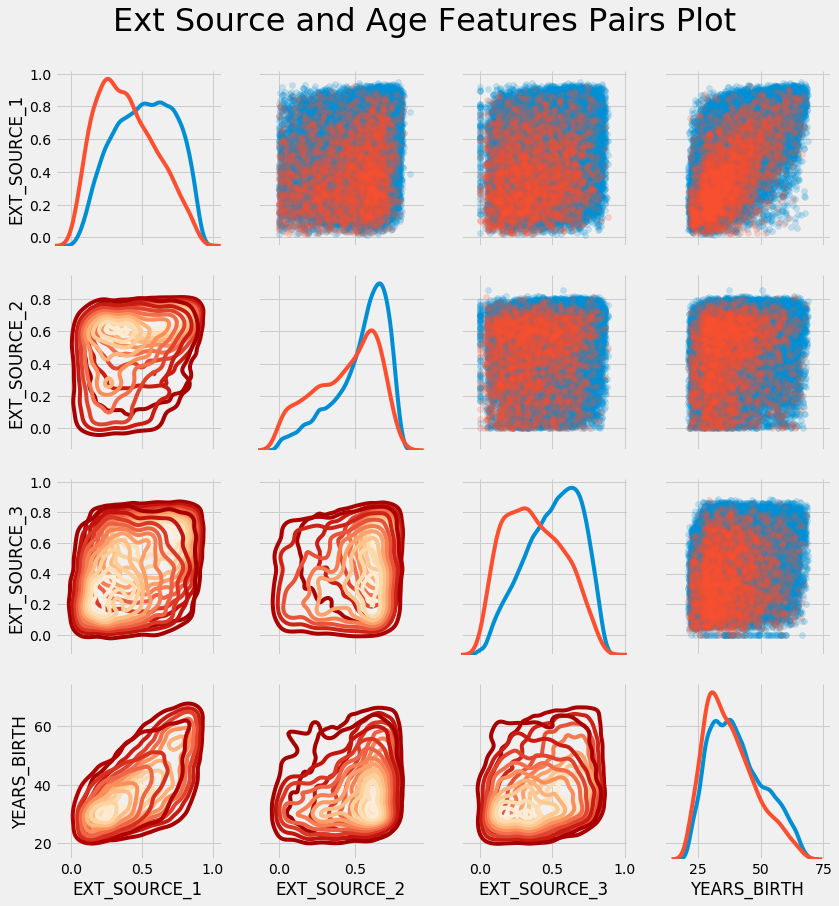

In [19]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);


In [20]:
# Make a new dataframe for polynomial features
poly_features = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [21]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [22]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [23]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [24]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
app_train_poly = train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
app_test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (48744, 274)


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 240 entries, SK_ID_CURR to TARGET
dtypes: float64(65), int32(3), int64(41), uint8(131)
memory usage: 290.6 MB


In [26]:
train['TARGET'].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

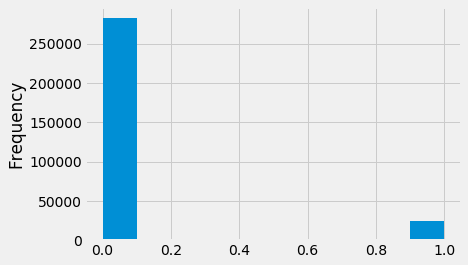

In [27]:
train['TARGET'].astype(int).plot.hist();

In [28]:
train.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE   ...    WALLSMATERIAL_MODE_Block  \
0                    0.018801   ...                           0   
1                    0.003541   ...                           1   
2                    0.010032   ...                           0   
3                    0.008019   ...                           0   
4                    0.028663   ...                           0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  TARGET  
0                       1                        0       1  
1                       1                        0       0  
2                       0                        0       0  
3                       0                        0       0  
4                       0                        0       0  

[5 rows x 240 columns]

In [29]:
train.get_dtype_counts()

float64     65
int32        3
int64       41
uint8      131
dtype: int64

In [30]:
train.index


RangeIndex(start=0, stop=307511, step=1)

In [31]:
type(train)

pandas.core.frame.DataFrame

In [32]:
train['SK_ID_CURR'].dtype

dtype('int64')

In [33]:
train['SK_ID_CURR'] =  train['SK_ID_CURR'].astype('str')

In [34]:
train.set_index("SK_ID_CURR", inplace = True)

In [35]:
train.head(5)

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                                                                    
100002                       0             0                1             0   
100003                       0             0                0             0   
100004                       1             1                1             0   
100006                       0             0                1             0   
100007                       0             0                1             0   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
100002              202500.0    406597.5      24700.5         351000.0   
100003              270000.0   1293502.5      35698.5        1129500.0   
100004               67500.0    135000.0       6750.0         135000.0   
100006              135000.0    312682.5      29686.5         297000.0   
100007              121500.0    513000.0      21865.5         513000.0   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH   ...    \
SK_ID_CURR                                           ...     
100002                        0.018801        9461   ...     
100003                        0.003541       16765   ...     
100004                        0.010032       19046   ...     
100006                        0.008019       19005   ...     
100007                        0.028663       19932   ...     

            WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
SK_ID_CURR                                                       
100002                             0                         0   
100003                             1                         0   
100004                             0                         0   
100006                             0                         0   
100007                             0                         0   

            WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
SK_ID_CURR                                                             
100002                                  0                          0   
100003                                  0                          0   
100004                                  0                          0   
100006                                  0                          0   
100007                                  0                          0   

            WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
SK_ID_CURR                                                              
100002                             0                                1   
100003                             0                                0   
100004                             0                                0   
100006                             0                                0   
100007                             0                                0   

            WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  \
SK_ID_CURR                                                      
100002                              0                       1   
100003                              0                       1   
100004                              0                       0   
100006                              0                       0   
100007                              0                       0   

            EMERGENCYSTATE_MODE_Yes  TARGET  
SK_ID_CURR                                   
100002                            0       1  
100003                            0       0  
100004                            0       0  
100006                            0       0  
100007                            0       0  

[5 rows x 239 columns]

In [36]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

Total    Percent
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
COMMONAREA_MEDI           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
LIVINGAPARTMENTS_AVG      210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
FLOORSMIN_AVG             208642  67.848630
FLOORSMIN_MEDI            208642  67.848630
FLOORSMIN_MODE            208642  67.848630
YEARS_BUILD_MODE          204488  66.497784
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_AVG              182590  59.376738
LANDAREA_MEDI             182590  59.376738
LANDAREA_MODE             182590  59.376738
BASEMENTAREA_MEDI         179943  58.515956

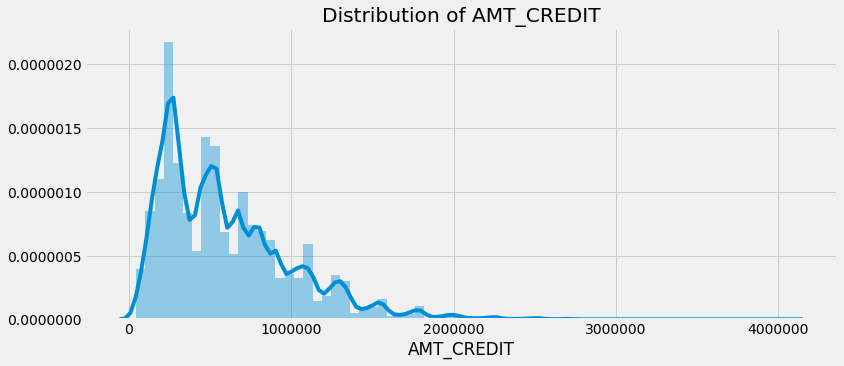

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train["AMT_CREDIT"], bins = 70)

In [38]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [39]:
# Number of unique classes in each object column
train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

[Text(0.5, 0, '')]

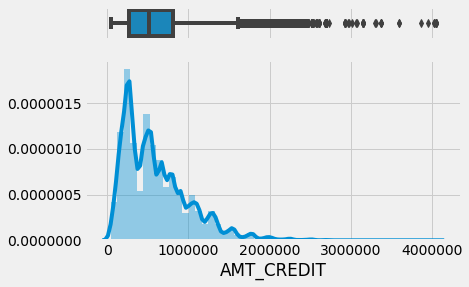

<Figure size 864x360 with 0 Axes>

In [40]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
plt.figure(figsize = (12,5))
sns.boxplot(train["AMT_CREDIT"], ax=ax_box)
sns.distplot(train["AMT_CREDIT"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


In [41]:
print(train.info()

SyntaxError: unexpected EOF while parsing (<ipython-input-41-3076b61457e7>, line 1)

In [ ]:
# let's make an histogram to get familiar with the
# distribution of the variable
plt.figure(figsize=(12,5))
fig = train.AMT_CREDIT.hist(bins=50)


In [ ]:
train.CODE_GENDER.unique()

In [ ]:
train['CODE_GENDER'].value_counts()

In [ ]:
# let's make an barf plot for each category
plt.figure(figsize=(12,5))
fig = .plot.bar()
fig.set_title('Gender')
fig.set_title('Number of customer')            

In [ ]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

In [ ]:
train.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.figure()